In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

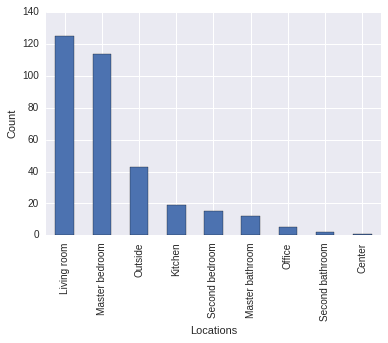

In [2]:
%run LoadAndReduceData.py

In [3]:
reduced_dataset_3readings[['sep_hour', 'location']].head()
print (reduced_dataset_10readings['location'].unique().max())
print (reduced_dataset_3readings['location'].unique())


9
[0 9 2 1 8 7 6 3 4]


Unique locations :  10 <class 'int'>
models created
Iteration 1: loglike=-5.279752e+02 (0.032 seconds)
Iteration 2: loglike=-4.970365e+02 (0.032 seconds)
Iteration 3: loglike=-4.857051e+02 (0.035 seconds)
Iteration 4: loglike=-4.800778e+02 (0.031 seconds)
Iteration 5: loglike=-4.765274e+02 (0.036 seconds)
Iteration 6: loglike=-4.739952e+02 (0.032 seconds)
Iteration 7: loglike=-4.721002e+02 (0.037 seconds)
Iteration 8: loglike=-4.706572e+02 (0.029 seconds)
Iteration 9: loglike=-4.695501e+02 (0.031 seconds)
Iteration 10: loglike=-4.686966e+02 (0.030 seconds)
Iteration 11: loglike=-4.680356e+02 (0.035 seconds)
Iteration 12: loglike=-4.675213e+02 (0.026 seconds)
Iteration 13: loglike=-4.671192e+02 (0.028 seconds)
Iteration 14: loglike=-4.668031e+02 (0.026 seconds)
Iteration 15: loglike=-4.665536e+02 (0.028 seconds)
Iteration 16: loglike=-4.663555e+02 (0.029 seconds)
Iteration 17: loglike=-4.661976e+02 (0.029 seconds)
Iteration 18: loglike=-4.660711e+02 (0.027 seconds)
Iteration 19: loglike

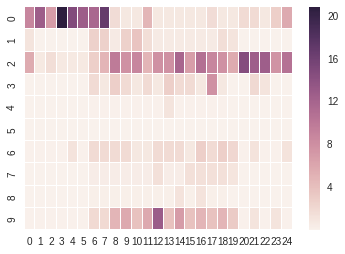

In [40]:

from HierarchicalDirichletCategorical import HierarchicalDirichletCategorical
import seaborn as sns

model1 = HierarchicalDirichletCategorical(reduced_dataset_3readings[['sep_hour', 'location']])
learned_params_1 = model1.create_model(model_type='2fold')

print(learned_params.shape)

sns.heatmap(learned_params_1.T, linewidths=.01)

Unique locations :  10 <class 'int'>
models created
Iteration 1: loglike=-1.703456e+05 (0.042 seconds)
Iteration 2: loglike=-1.703287e+05 (0.036 seconds)
Iteration 3: loglike=-1.703284e+05 (0.042 seconds)
Converged at iteration 3.
learned params
(24, 10)


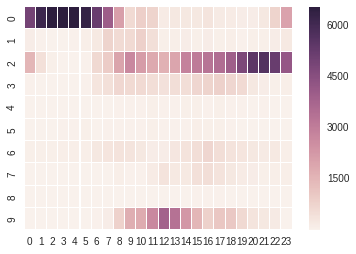

In [48]:

model2 = HierarchicalDirichletCategorical(reduced_dataset_3readings[['sep_hour', 'location']])
learned_params_2 = model2.create_model(model_type='all')

print(learned_params_2.shape)

sns.heatmap(learned_params.T, linewidths=.01)

# Posterior Evaluation

In [9]:
from bayespy.utils import random

print (dataset.shape[0])
learned_dataset = pd.DataFrame(columns=['location','sep_hour'])

for tt in dataset['sep_hour'].unique():
    temp = pd.DataFrame(columns=['location','sep_hour'])
    #temp['location'] = random.categorical(learned_params[tt], size= int(dataset.shape[0]/24))
    temp['location'] = random.categorical(learned_params[tt], size= 5000)
    temp['sep_hour'] = tt
    temp.shape

    learned_dataset= learned_dataset.append(temp, ignore_index=True)
    
print(learned_dataset.shape)

161280
(120000, 2)


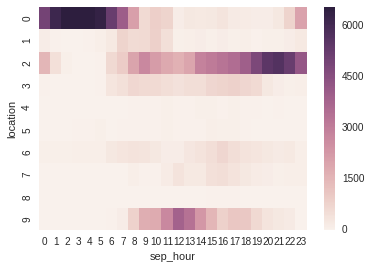

In [35]:
#sns.heatmap(dataset[['sep_hour', 'location_name']])
hour_vs_location = pd.crosstab(dataset['location'], 
                               dataset['sep_hour'])
sns.heatmap(hour_vs_location)

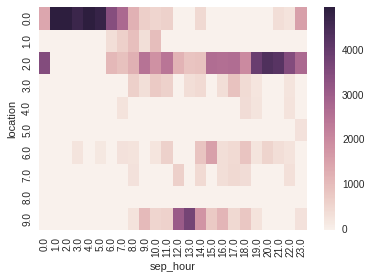

In [11]:
learned_hour_vs_location = pd.crosstab(learned_dataset['location'], 
                               learned_dataset['sep_hour'])
sns.heatmap(learned_hour_vs_location)

In [12]:
print (learned_hour_vs_location[0.0])

############################################33
# For Chi square test needs to be greater than 5
############################################33
hour_vs_location[ hour_vs_location <= 5] = 6
print (hour_vs_location[0.0])

hour_vs_location.to_csv('./hour_vs_location.csv')

location
0.0    1444
1.0       9
2.0    3504
3.0      10
4.0       4
5.0       3
6.0       6
7.0       7
8.0       5
9.0       8
Name: 0.0, dtype: int64
location
0    4973
1     153
2    1493
3      29
4       8
5       6
6      56
7       6
8       6
9       6
Name: 0, dtype: int64


# Stats Model 

Calculates power discrepancy, a class of goodness-of-fit tests as a measure of discrepancy between observed and expected data.

This contains several goodness-of-fit tests as special cases, see the describtion of lambd, the exponent of the power discrepancy. The pvalue is based on the asymptotic chi-square distribution of the test statistic

>The closer the obtained chi-square is to zero, the more similar the two sets of frequencies are - or, stated another way, the better the observed data fit the expected pattern. This interpretation is where the term "goodness of fit" originates

In [13]:
import scipy.stats as stats

for tt in dataset['sep_hour'].unique():
    observed = learned_hour_vs_location[tt].as_matrix()
    expected = hour_vs_location[tt].as_matrix()
    print (stats.chisquare(f_obs = observed,
                    f_exp = expected))

Power_divergenceResult(statistic=5410.1332845625047, pvalue=0.0)
Power_divergenceResult(statistic=759.01535942459611, pvalue=1.4045906023151463e-157)
Power_divergenceResult(statistic=522.89391414765441, pvalue=7.1789026747150472e-107)
Power_divergenceResult(statistic=922.70746521894364, pvalue=7.9139748368156169e-193)
Power_divergenceResult(statistic=544.11080141620528, pvalue=2.0375098729439703e-111)
Power_divergenceResult(statistic=778.62737702698075, pvalue=8.4631071401246688e-162)
Power_divergenceResult(statistic=1721.1517128917394, pvalue=0.0)
Power_divergenceResult(statistic=5170.5470610556822, pvalue=0.0)
Power_divergenceResult(statistic=1991.9121488868104, pvalue=0.0)
Power_divergenceResult(statistic=898.72572587590003, pvalue=1.1641860445787953e-187)
Power_divergenceResult(statistic=1241.1682850969391, pvalue=1.5679844453698407e-261)
Power_divergenceResult(statistic=4129.0075714267532, pvalue=0.0)
Power_divergenceResult(statistic=1193.4343677906354, pvalue=3.1704137841191675e-

In [53]:

import scipy.stats as stats

for tt in dataset['sep_hour'].unique():
    observed_1 = np.round((learned_params_1[tt]/np.sum(learned_params_1[tt])), 4)
    expected_1 = np.round ((hour_vs_location[tt].as_matrix() / hour_vs_location[tt].sum()), 4 )
    observed_2 = np.round((learned_params_2[tt]/np.sum(learned_params_2[tt])), 4)
    expected_2 = np.round ((hour_vs_location[tt].as_matrix() / hour_vs_location[tt].sum()), 4 )
    print (bhatta(observed_1, expected_1) , bhatta(observed_2, expected_2))

0.16829336354118404 0.0032708905262347787
0.11860692636148065 0.007887257262652436
0.28591292180594846 0.004344532363777917
0.15801150406040487 0.009265649043077818
0.21399772650633989 0.010201341231078756
0.15442831608614063 0.007117621783840813
0.2571746398199008 0.0010024569082999132
0.1321217501155423 5.792767048727818e-05
0.2501490722801573 1.0536712127723509e-08
0.1214262956136811 0.0007438924606613091
0.1808691116101672 0.0010653002571719182
0.1464590455184306 0.0008792873232578066
0.13241676617131606 0.0003043223765526981
0.2603758507975819 0.0005401020358222598
0.13687512703744925 0.0005697130400147449
0.10420060307993566 0.00020750042779338565
0.17524695036330065 0.00033567964804894596
0.19004867299256237 0.00044706529448972933
0.22797669407302193 0.0007299530315038062
0.3279173388062297 0.0012171310387629173
0.20257046559972844 0.001376567434370712
0.18643529933404918 0.0016851760634747034
0.15931793144007103 0.0013185188604529852
0.1975728496472236 0.0007442344108625868


In [37]:
import scipy.stats as stats
pk = np.round((learned_params[0]/np.sum(learned_params[0])), 4)
qk = np.round ((hour_vs_location[0].as_matrix() / hour_vs_location[0].sum()), 4 )

print (pk.size, qk)
print (stats.entropy(pk, qk))
print (bhatta(pk,pk))

10 [  7.40000000e-01   2.28000000e-02   2.22200000e-01   4.30000000e-03
   1.20000000e-03   7.00000000e-04   8.30000000e-03   3.00000000e-04
   0.00000000e+00   1.00000000e-04]
inf
1.0001


In [52]:
def bhatta ( hist1,  hist2):
    # calculate mean of hist1
    h1_ = np.mean(hist1);

    # calculate mean of hist2
    h2_ = np.mean(hist2);
    
    size = hist1.size

    # calculate score
    score = 0;
    for i in range(size):
        score += np.math.sqrt( hist1[i] * hist2[i] );
    # print h1_,h2_,score;
    score = np.math.sqrt( 1 - ( 1 / np.math.sqrt(h1_*h2_*size*size) ) * score );
    return score;

In [50]:
def bhatta ( hist1,  hist2):
    if (hist1.size != hist2.size):
        raise "Histograms size dont match"
        return
    
    size = hist1.size
    # calculate score
    score = 0;
    for i in range(size):
        score += np.sqrt( hist1[i] * hist2[i] );
    return score;

In [14]:
# dataanalysis for creatign data for JASP
hour_based_locations = pd.DataFrame()
hour_based_locations[0] = dataset[dataset['sep_hour'] == 0].location_name.values
hour_based_locations[1] = dataset[dataset['sep_hour'] == 1].location_name.values
hour_based_locations[16] = dataset[dataset['sep_hour'] == 16].location_name.values
hour_based_locations.head()
hour_based_locations.to_csv('hour_based_locations.csv')

In [54]:
locations.random()[23]

array([2])

In [10]:
import pandas as pd
import HierarchicalDirichletCategorical

testdata = pd.DataFrame([[1,1],[2,2],[0,0]], columns=['time', 'location'])
model = HierarchicalDirichletCategorical.HierarchicalDirichletCategorical(testdata)
model.create_model(model_type='all')

TypeError: create_model() got an unexpected keyword argument 'model_type'